<a href="https://colab.research.google.com/github/thaisgulias/DataAnalytics_student/blob/main/projeto_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Declaração das LIBS

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa

##Config . do pandas

In [ ]:
pd.set_option('display.max_columns',100)

##Conector para Cloud Storage(bucket)

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

# serviceAccount = '/content/compact-epigram-377819-c2c380ae78c0.json'
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage
# client = storage.Client()
# bucket = client.get_bucket('projeto_pandas')
# bucket.blob('marketing_campaign.csv')
# path = 'gs://projeto_pandas/brutos/marketing_campaign.csv'

In [ ]:
url = "https://storage.googleapis.com/projeto_pandas/brutos/marketing_campaign.csv"
df = pd.read_csv(url)
#bucket publico

##Extração dos dados

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


##pré analise

In [ ]:
df.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.columns #identificar nome das colunas

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.duplicated().sum() #identificar duplicados

0

In [ ]:
df.isna().sum() #24 valores ausentes em renda

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.isnull().sum() # confirmação dos valores nulos, 24 valores nulos

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
pd.unique(df['Year_Birth']) #tem duas datas menores que 1900: 1893, 1899, 1900

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [ ]:
# df['data_cadastro'] = pd.to_datetime(df['data_cadastro']) # Converter para datetime
# df['data_cadastro'] = df['data_cadastro'].astype(str) #Converter coluna data para string

In [ ]:
pd.unique(df['Z_CostContact']) 

array([3])

In [ ]:
pd.unique(df['Z_Revenue'])

array([11])

In [ ]:
df = df.drop(['Z_CostContact','Z_Revenue'], axis=1) # as colunas apresentam o mesmo valor para todos os itens, como não contem um dicionario de dados

Verificar a existência de dados inconsistentes e realizar a limpeza para NaN ou NA explicando o porque da decisão: Como se tratava apenas da coluna renda, sendo 1% dos dados, optou por colocar o valor referente a 0.

In [ ]:
pd.unique(df['Income'])

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [ ]:
df['Income'] = df['Income'].replace([np.inf, -np.inf], np.nan) #substitui valores infinitos por NaN

In [ ]:
df.dropna(inplace=True) #com o erro no mongo se optou remover todas as linhas que contêm pelo menos um valor ausente (NA/null) 

##Tradução

In [ ]:
df = df.rename(columns={
       'Year_Birth':'Ano_Nascimento', 'Education':'Educacao', 'Marital_Status':'estado_civil' , 'Income':'Renda', 'Kidhome':'criancas',
       'Teenhome':'adolescentes', 'Dt_Customer':'data_cadastro', 'Recency':'ultima_compra', 'MntWines':'qtd_vinho', 'MntFruits':'qqtd_frutas',
       'MntMeatProducts':'qtd_carnes', 'MntFishProducts':'qtd_peixe', 'MntSweetProducts':'qtd_doces',
       'MntGoldProds':'qtd_produtosouro', 'NumDealsPurchases':'qtd_ofertas', 'NumWebPurchases':'qtd_web',
       'NumCatalogPurchases':'qtd_catago', 'NumStorePurchases':'qtd_loja', 'NumWebVisitsMonth':'qtd_visitasweb',
       'AcceptedCmp3':'aceitou_3cmp', 'AcceptedCmp4':'aceitou_4cmp', 'AcceptedCmp5':'aceitou_5cmp', 'AcceptedCmp1':'aceitou_1camp',
       'AcceptedCmp2':'aceitou_2cmp', 'Complain':'reclamou', 'Z_CostContact':'custo_contato', 'Z_Revenue':'receita', 'Response':'resposta'
})

In [ ]:
df['Educacao'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df['Educacao'].replace({'Graduation':'graduacao', 'PhD':'doutorado', 'Master':'mestrado', 'Basic':'basico', '2n Cycle':'pos_graduacao'}, inplace=True)

In [ ]:
df['estado_civil'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
df['estado_civil'].replace({'Single': 'solteiro', 'Together': 'nao_sozinho', 'Married': 'casado', 'Divorced': 'divorciado', 'Widow': 'viuvo', 'Alone': 'sozinho', 'Absurd': 'nao_declarou', 'YOLO': 'livre'}, inplace=True)


In [ ]:
df

,ID,Ano_Nascimento,Educacao,estado_civil,Renda,criancas,adolescentes,data_cadastro,ultima_compra,qtd_vinho,qqtd_frutas,qtd_carnes,qtd_peixe,qtd_doces,qtd_produtosouro,qtd_ofertas,qtd_web,qtd_catago,qtd_loja,qtd_visitasweb,aceitou_3cmp,aceitou_4cmp,aceitou_5cmp,aceitou_1camp,aceitou_2cmp,reclamou,resposta
0,5524,1957,graduacao,solteiro,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,graduacao,solteiro,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,graduacao,nao_sozinho,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,graduacao,nao_sozinho,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,doutorado,casado,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduacao,casado,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,doutorado,nao_sozinho,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,graduacao,divorciado,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,mestrado,nao_sozinho,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2240 non-null   int64  
 1   Ano_Nascimento    2240 non-null   int64  
 2   Educacao          2240 non-null   object 
 3   estado_civil      2240 non-null   object 
 4   Renda             2216 non-null   float64
 5   criancas          2240 non-null   int64  
 6   adolescentes      2240 non-null   int64  
 7   data_cadastro     2240 non-null   object 
 8   ultima_compra     2240 non-null   int64  
 9   qtd_vinho         2240 non-null   int64  
 10  qqtd_frutas       2240 non-null   int64  
 11  qtd_carnes        2240 non-null   int64  
 12  qtd_peixe         2240 non-null   int64  
 13  qtd_doces         2240 non-null   int64  
 14  qtd_produtosouro  2240 non-null   int64  
 15  qtd_ofertas       2240 non-null   int64  
 16  qtd_web           2240 non-null   int64  


##Validação

In [ ]:
import pandera as pa

schema = pa.DataFrameSchema({
    "ID": pa.Column(pa.Int, nullable=False),
    "Ano_Nascimento": pa.Column(pa.Int, nullable=False),
     "Educacao": pa.Column(pa.String, nullable=False),
    "estado_civil": pa.Column(pa.String, nullable=False),
    "Renda": pa.Column(pa.Float, nullable=True),
    "criancas": pa.Column(pa.Int, nullable=False),
    "adolescentes": pa.Column(pa.Int, nullable=False),
    "data_cadastro": pa.Column(pa.String, nullable=False),
    "ultima_compra": pa.Column(pa.Int, nullable=False),
    "qtd_vinho": pa.Column(pa.Int, nullable=False),
    "qqtd_frutas": pa.Column(pa.Int, nullable=False),
    "qtd_carnes": pa.Column(pa.Int, nullable=False),
    "qtd_peixe": pa.Column(pa.Int, nullable=False),
    "qtd_doces": pa.Column(pa.Int, nullable=False),
    "qtd_produtosouro": pa.Column(pa.Int, nullable=False),
    "qtd_ofertas": pa.Column(pa.Int, nullable=False),
    "qtd_web": pa.Column(pa.Int, nullable=False),
    "qtd_catago": pa.Column(pa.Int, nullable=False),
    "qtd_loja": pa.Column(pa.Int, nullable=False),
    "qtd_visitasweb": pa.Column(pa.Int, nullable=False),
    "aceitou_3cmp": pa.Column(pa.Int, nullable=False),
    "aceitou_4cmp": pa.Column(pa.Int, nullable=False),
    "aceitou_5cmp": pa.Column(pa.Int, nullable=False),
    "aceitou_1camp": pa.Column(pa.Int, nullable=False),
    "aceitou_2cmp": pa.Column(pa.Int, nullable=False),
    "reclamou": pa.Column(pa.Int, nullable=False),
    "resposta": pa.Column(pa.Int, nullable=False)
})


In [ ]:
valid_data = schema.validate(df)

##Analises

In [ ]:
df_edu = df.groupby('Educacao').sum()[['criancas', 'adolescentes']] #relação escolaridade com número de crianças e adolescentes
df_edu

,criancas,adolescentes
Educacao,,
basico,34,5
doutorado,191,289
graduacao,492,549
mestrado,167,195
pos_graduacao,95,82


In [ ]:
df_edu['total_filhos'] = df_edu['criancas'] + df_edu['adolescentes'] #relaçao escolaridade com a quantidade de filhos

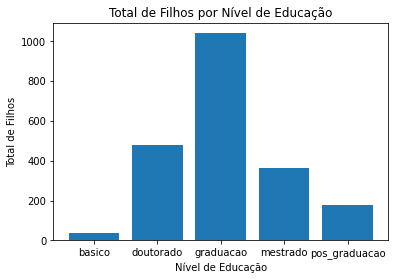

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df_edu.index, df_edu['total_filhos'])

plt.title('Total de Filhos por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Total de Filhos')
plt.show()

In [ ]:
df_grouped = df.groupby(['criancas', 'adolescentes'])['qtd_doces'].mean()
df_grouped #Média de compras de doces por quantidade de crianças e adolescentes

criancas  adolescentes
0         0               53.180095
          1               28.775806
          2               19.133333
1         0                9.420523
          1                7.439024
          2               10.095238
2         0                8.058824
          1                1.448276
Name: qtd_doces, dtype: float64

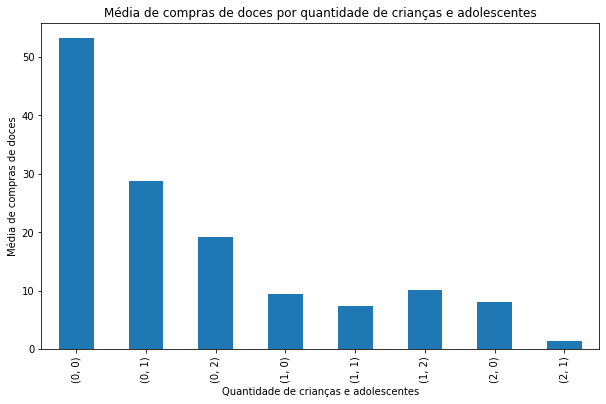

In [ ]:
df_grouped = df.groupby(['criancas', 'adolescentes'])['qtd_doces'].mean()

ax = df_grouped.plot.bar(figsize=(10, 6))
ax.set_title("Média de compras de doces por quantidade de crianças e adolescentes")
ax.set_xlabel("Quantidade de crianças e adolescentes")
ax.set_ylabel("Média de compras de doces")
plt.show()


In [ ]:
df.groupby(['estado_civil'])['qtd_doces'].mean()

estado_civil
casado          26.701389
divorciado      26.818966
livre            3.000000
nao_declarou    30.500000
nao_sozinho     26.122414
solteiro        27.262500
sozinho          7.000000
viuvo           39.012987
Name: qtd_doces, dtype: float64

In [ ]:
df_relacao = df[['Educacao', 'Renda', 'ultima_compra']].dropna()
df_relacao = df_relacao.sort_values('Educacao')
 #dropna para renover dados nulos
df_relacao #relação entre as variaveis educacao, renda e ultima_compra

,Educacao,Renda,ultima_compra
1755,basico,16014.0,42
502,basico,24279.0,6
2164,basico,15253.0,13
1246,basico,7500.0,63
1240,basico,25707.0,18
...,...,...,...
2086,pos_graduacao,87000.0,61
148,pos_graduacao,35688.0,94
1363,pos_graduacao,52203.0,36
1437,pos_graduacao,20491.0,16


In [ ]:
df_teste = df.groupby('estado_civil')['qtd_vinho'].mean().sort_values() #media do consumo de vinho por estado civil
df_teste

estado_civil
sozinho         184.666667
solteiro        291.331210
casado          299.855309
nao_sozinho     308.403141
livre           322.000000
divorciado      324.844828
nao_declarou    355.500000
viuvo           367.131579
Name: qtd_vinho, dtype: float64

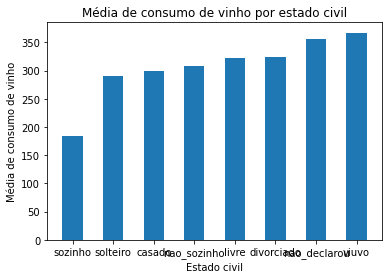

In [ ]:
df_teste = df.groupby('estado_civil')['qtd_vinho'].mean().sort_values()

plt.bar(df_teste.index, df_teste.values, width=0.5)
plt.title('Média de consumo de vinho por estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Média de consumo de vinho')

plt.show() 

In [ ]:
df['idade'] = 2020 - df['Ano_Nascimento'] #criar uma coluna com idade em relação ao ano

In [ ]:
df.groupby('estado_civil')['idade'].mean()

estado_civil
casado          50.420139
divorciado      53.724138
livre           47.000000
nao_declarou    45.000000
nao_sozinho     52.253448
solteiro        48.510417
sozinho         47.000000
viuvo           61.441558
Name: idade, dtype: float64

In [ ]:
df.groupby('estado_civil')['qtd_web'].mean() #relação estado civil e compras na web


estado_civil
casado          4.087963
divorciado      4.310345
livre           7.000000
nao_declarou    3.500000
nao_sozinho     4.081034
solteiro        3.872917
sozinho         5.000000
viuvo           4.623377
Name: qtd_web, dtype: float64

In [ ]:
df_web = df.groupby('idade')['qtd_web'].mean() #relação quantidade e compras na internet e a idade, lembrando que há 3 variaveis com anos de nascimento inferiores a 1900
df_web

idade
24     2.000000
25     2.800000
26     5.000000
27     4.400000
28     3.153846
29     4.066667
30     3.444444
31     2.724138
32     3.413793
33     3.333333
34     3.170732
35     2.843750
36     3.052632
37     3.268293
38     4.000000
39     4.052632
40     3.948718
41     3.698113
42     3.552632
43     3.980769
44     3.808989
45     3.987952
46     3.927536
47     3.541667
48     4.012821
49     3.825581
50     4.053333
51     4.385714
52     4.627451
53     4.409091
54     4.300000
55     4.648649
56     4.536585
57     4.068182
58     4.477273
59     4.628571
60     3.673469
61     4.400000
62     4.307692
63     4.243902
64     4.963636
65     4.916667
66     4.897959
67     4.514286
68     4.000000
69     4.690476
70     3.586207
71     5.000000
72     4.333333
73     4.750000
74     5.250000
75     8.250000
76     5.714286
77     6.333333
79     7.000000
80     3.000000
120    2.000000
121    4.000000
127    1.000000
Name: qtd_web, dtype: float64

In [ ]:
df['idade'].describe()

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: idade, dtype: float64

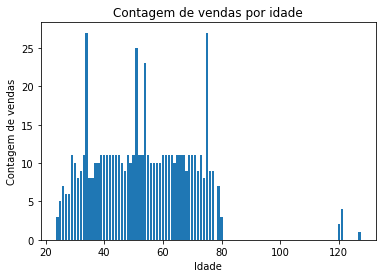

In [ ]:
plt.bar(df['idade'], df['qtd_web'])  #relação de idades e compra na web

plt.title('Contagem de vendas por idade')
plt.xlabel('Idade')
plt.ylabel('Contagem de vendas')

plt.show()

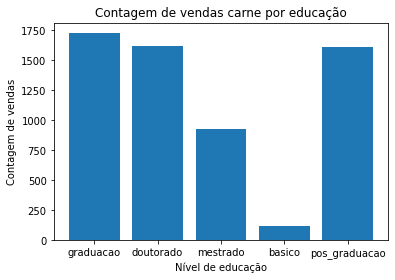

In [ ]:
plt.bar(df['Educacao'], df['qtd_carnes']) #relação de educação e consumo de carne

plt.title('Contagem de vendas carne por educação')
plt.xlabel('Nível de educação')
plt.ylabel('Contagem de vendas')

plt.show()

##Sugestoes para o marketing

In [ ]:
#focar as vendas de vinho e doces por web para pessoas viuvas, visto que a faixa etaria, consumo e acesso a web estão alinhados

In [ ]:
#focar a venda de doces em pessoas sem filhos

In [ ]:
#focar a venda de web nas pessoas livres (YOLO) 

#MongoDB

In [ ]:
pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymongo
from pymongo import MongoClient

In [ ]:
#Concector MongoDB Atlas
uri = "mongodb+srv://cluster0.jjkb9co.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,tlsCertificateKeyFile='/content/X509-cert-3926889476236238374.pem')
                     
db = client['soulcode']

In [ ]:
db = client['soulcode']
colecao = db['naotratado']
colecao.estimated_document_count({})

documentos = df.to_dict(orient='records')

colecao.insert_many(documentos) #dados não tratados

In [ ]:
db2 = client['soulcode']
colecaosoulcode = db2['tratado']
colecaosoulcode.count_documents({})

df_dict = df.to_dict("records")

colecaosoulcode.insert_many(df_dict) #dados tratados

##Salvar csv para subir no bucket 

In [ ]:
df.to_csv('mkt_tratado.csv', index=False) #salvar aarquivo csv

In [ ]:
 #Carregar direto no bucket
df.to_csv('gs://projeto_pandas/tratados/mkt_tratado.csv',index=False)